#📌 Extracción

In [187]:
import pandas as pd

# Cargar datos desde archivo JSON
df = pd.read_json('TelecomX_Data.json')

# Ver estructura general
print("Shape del dataset:", df.shape)
df.head()

Shape del dataset: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [188]:
# Normalizar columnas anidadas
customer_expanded = pd.json_normalize(df['customer'])
phone_expanded = pd.json_normalize(df['phone'])
internet_expanded = pd.json_normalize(df['internet'])
account_expanded = pd.json_normalize(df['account'])



In [189]:
# Normalizar también la subcolumna 'Charges' dentro de 'account'
charges_expanded = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
charges_expanded.rename(columns={'Monthly': 'Charges.Monthly', 'Total': 'Charges.Total'}, inplace=True)

# Eliminamos la columna Charges (si existe)
account_expanded = account_expanded.drop(columns=['Charges'], errors='ignore')

# Renombrar columnas de Charges
charges_expanded.rename(columns={'Monthly': 'Charges.Monthly', 'Total': 'Charges.Total'}, inplace=True)


In [190]:
# Combinar todo en un nuevo DataFrame
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    customer_expanded,
    phone_expanded,
    internet_expanded,
    account_expanded,
    charges_expanded
], axis=1)

# Eliminar columnas duplicadas (por nombre)
df_flat = df_flat.loc[:, ~df_flat.columns.duplicated()]

# Confirmar columnas únicas
print("Columnas únicas:", df_flat.columns.tolist())


Columnas únicas: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [191]:
#Visualizar data frame
df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [192]:
# Verificar tipos antes de transformar
print(df_flat.dtypes[['Charges.Monthly', 'Charges.Total']])

# Convertimos Charges.Total y Charges.Monthly a float
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')


# Verificamos tipos de datos
print(df_flat[['Charges.Monthly', 'Charges.Total']].dtypes)

Charges.Monthly    float64
Charges.Total       object
dtype: object
Charges.Monthly    float64
Charges.Total      float64
dtype: object


In [193]:
#Muestra las filas con valores nulos-NaN
df_flat[df_flat.isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
# Contar valores nulos por columna
missing = df_flat.isnull().sum()
missing = missing[missing > 0]  # Filtramos solo columnas con valores faltantes

print("Columnas con valores nulos:")
print(missing)

Columnas con valores nulos:
Charges.Total    11
dtype: int64


In [195]:
# Eliminar filas donde Charges.Total sea nulo
df_flat = df_flat[df_flat['Charges.Total'].notnull()].copy()

# Confirmar anulacion
print("Valores nulos después de limpiar:")
print(df_flat['Charges.Total'].isnull().sum())

Valores nulos después de limpiar:
0


In [196]:
# Visualizar data frame
df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [197]:
# Crear columna 'cuentas_diarias'
df_flat['cuentas_diarias'] = df_flat.apply(
    lambda row: row['Charges.Total'] / (row['tenure'] * 30) if row['tenure'] > 0 else 0,
    axis=1
)

In [198]:
print(df_flat[['Charges.Total', 'tenure', 'cuentas_diarias']].head(10))

   Charges.Total  tenure  cuentas_diarias
0         593.30       9         2.197407
1         542.40       9         2.008889
2         280.85       4         2.340417
3        1237.85      13         3.173974
4         267.40       3         2.971111
5         571.45       9         2.116481
6        7904.25      71         3.710915
7        5377.80      63         2.845397
8         340.35       7         1.620714
9        5957.90      65         3.055333


In [199]:
cols_yes_no = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
]

In [200]:
# Reemplazo estándar
df_flat[cols_yes_no] = df_flat[cols_yes_no].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-200-1829652535.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_flat[cols_yes_no] = df_flat[cols_yes_no].replace({'Yes': 1, 'No': 0})


In [201]:
# Convertir Churn a Binario
df_flat['Churn'] = df_flat['Churn'].replace({'Yes': 1, 'No': 0})

In [202]:
#Estandarizar valores como "No internet service" → 0
replace_no_service = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_flat[replace_no_service] = df_flat[replace_no_service].replace({'No internet service': 0, 'No phone service': 0})

/tmp/ipython-input-202-1296856346.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_flat[replace_no_service] = df_flat[replace_no_service].replace({'No internet service': 0, 'No phone service': 0})


In [203]:
# Muestra conversion a  binarios
print(df_flat[cols_yes_no + ['Churn']].head())

   Partner  Dependents  PhoneService  MultipleLines  OnlineSecurity  \
0        1           1             1              0               0   
1        0           0             1              1               0   
2        0           0             1              0               0   
3        1           0             1              0               0   
4        1           0             1              0               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             1                 0            1            1                0   
1             0                 0            0            0                1   
2             0                 1            0            0                0   
3             1                 1            0            1                1   
4             0                 0            1            1                0   

   PaperlessBilling Churn  
0                 1     0  
1                 0     0  
2       

In [204]:
# Traduccion de Nombres
columnas_traduccion = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Respaldo_En_Linea',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'cuentas_diarias': 'Cuentas_Diarias'
}



In [205]:
# Renombrar columnas
df_flat.rename(columns=columnas_traduccion, inplace=True)

In [206]:
#Verificar el cambio
print("Columnas renombradas:")
print(df_flat.columns.tolist())

Columnas renombradas:
['ID_Cliente', 'Evasion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_En_Linea', 'Respaldo_En_Linea', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']


In [207]:
df_flat.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.971111


In [208]:
#Traduce valores de la columna Genero
df_flat['Genero'] = df_flat['Genero'].replace({
    'Female': 'Femenino',
    'Male': 'Masculino'
})

In [209]:
#Traduce valores de la columna Tipo_Contrato
df_flat['Tipo_Contrato'] = df_flat['Tipo_Contrato'].replace({
    'Month-to-month': 'Mensual',
    'One year': 'Un Año',
    'Two year': 'Dos Años'
})

In [210]:
#Traduce valores de la columna Metodo_Pago
df_flat['Metodo_Pago'] = df_flat['Metodo_Pago'].replace({
    'Electronic check': 'Cheque-E',
    'Mailed check': 'Cheque',
    'Bank transfer (automatic)': 'Transf',
    'Credit card (automatic)': 'Tarj-de-Créd'
})

In [211]:
#Verificar los cambios
print(df_flat[['Genero', 'Tipo_Contrato', 'Metodo_Pago']].drop_duplicates())

        Genero Tipo_Contrato   Metodo_Pago
0     Femenino        Un Año        Cheque
1    Masculino       Mensual        Cheque
2    Masculino       Mensual      Cheque-E
4     Femenino       Mensual        Cheque
5     Femenino       Mensual  Tarj-de-Créd
6     Femenino      Dos Años        Transf
7    Masculino      Dos Años  Tarj-de-Créd
8     Femenino       Mensual      Cheque-E
9     Femenino      Dos Años        Cheque
11    Femenino      Dos Años  Tarj-de-Créd
18   Masculino        Un Año  Tarj-de-Créd
20    Femenino        Un Año      Cheque-E
25    Femenino       Mensual        Transf
26    Femenino        Un Año        Transf
28   Masculino        Un Año        Transf
36    Femenino      Dos Años      Cheque-E
40   Masculino       Mensual        Transf
46   Masculino      Dos Años        Transf
47    Femenino        Un Año  Tarj-de-Créd
51   Masculino        Un Año      Cheque-E
54   Masculino       Mensual  Tarj-de-Créd
76   Masculino        Un Año        Cheque
87   Mascul

#📊 Carga y análisis

In [212]:
# Conteo numérico
print(df_flat['Evasion'].value_counts())

# Porcentaje
print(df_flat['Evasion'].value_counts(normalize=True) * 100)

Evasion
0    5163
1    1869
      224
Name: count, dtype: int64
Evasion
0    71.154906
1    25.757993
      3.087100
Name: proportion, dtype: float64


In [213]:
print("Valores únicos en Evasion:", df_flat['Evasion'].unique())

Valores únicos en Evasion: [0 1 '']


In [214]:
# Mostrar filas con valores inválidos en Evasion
df_flat[~df_flat['Evasion'].isin([0, 1])][['ID_Cliente', 'Evasion']].head(10)

,ID_Cliente,Evasion
30,0047-ZHDTW,
75,0120-YZLQA,
96,0154-QYHJU,
98,0162-RZGMZ,
175,0274-VVQOQ,
219,0328-IBUPK,
312,0448-YZNZE,
351,0510-EXSMQ,
368,0530-HBKHZ,
374,0534-JRNIG,


In [215]:
# Muestra Evasion con valores vacíos, nulos o espacios
df_flat[df_flat['Evasion'].isin(['', ' ', None])]

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
30,0047-ZHDTW,,Femenino,0,0,0,11,1,1,Fiber optic,...,0,0,0,0,Mensual,1,Transf,79.00,929.30,2.816061
75,0120-YZLQA,,Masculino,0,0,0,71,1,0,No,...,0,0,0,0,Dos Años,1,Tarj-de-Créd,19.90,1355.10,0.636197
96,0154-QYHJU,,Masculino,0,0,0,29,1,0,DSL,...,0,1,0,0,Un Año,1,Cheque-E,58.75,1696.20,1.949655
98,0162-RZGMZ,,Femenino,1,0,0,5,1,0,DSL,...,0,1,0,0,Mensual,0,Tarj-de-Créd,59.90,287.85,1.919000
175,0274-VVQOQ,,Masculino,1,1,0,65,1,1,Fiber optic,...,1,0,1,1,Un Año,1,Transf,103.15,6792.45,3.483308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Femenino,0,0,0,14,1,1,DSL,...,0,0,0,0,Un Año,1,Cheque,54.25,773.20,1.840952
7180,9872-RZQQB,,Femenino,0,1,0,49,0,0,DSL,...,0,0,1,0,Mensual,0,Transf,40.65,2070.75,1.408673
7211,9920-GNDMB,,Masculino,0,0,0,9,1,1,Fiber optic,...,0,0,0,0,Mensual,1,Cheque-E,76.25,684.85,2.536481
7239,9955-RVWSC,,Femenino,0,1,1,67,1,0,No,...,0,0,0,0,Dos Años,1,Transf,19.25,1372.90,0.683035


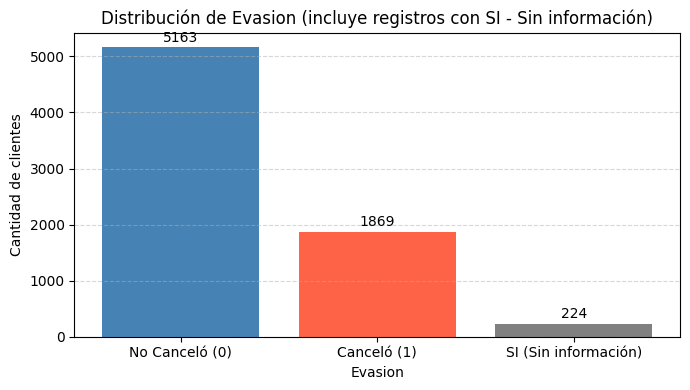

In [216]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Contar valores de Evasion, incluyendo los NaN
churn_counts = df_flat['Evasion'].value_counts(dropna=False)

# 2. Convertir índice a string para etiquetar
#churn_counts.index = churn_counts.index.map(lambda x: str(int(x)) if pd.notna(x) else 'SI')
churn_counts.index = churn_counts.index.map(lambda x: str(int(x)) if str(x).strip().isdigit() else 'SI')

# 3. Orden forzado y relleno si falta alguno
ordered_classes = ['0', '1', 'SI']
churn_counts = churn_counts.reindex(ordered_classes).fillna(0)

# 4. Etiquetas y colores
xtick_labels = ['No Canceló (0)', 'Canceló (1)', 'SI (Sin información)']
colors = ['steelblue', 'tomato', 'gray']

# 5. Gráfico
plt.figure(figsize=(7, 4))
bars = plt.bar(range(len(churn_counts)), churn_counts.values, color=colors)

# 6. Eje X
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels)

# 7. Mostrar cantidad sobre cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, int(height), ha='center', va='bottom')

# 8. Estética
plt.title('Distribución de Evasion (incluye registros con SI - Sin información)')
plt.xlabel('Evasion')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


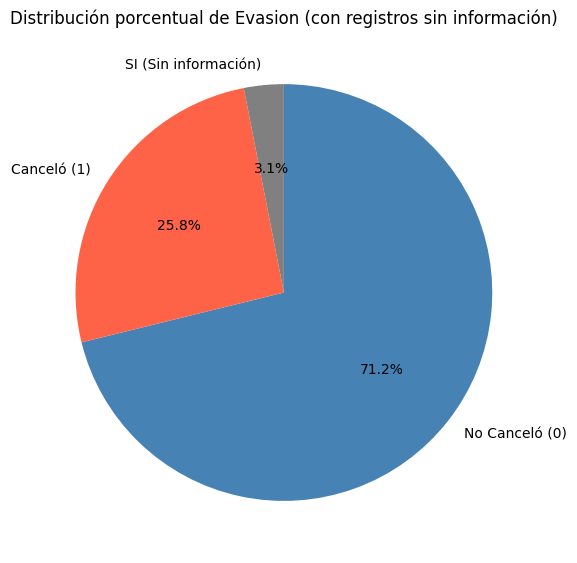

In [217]:
import matplotlib.pyplot as plt

# Reutilizamos Evasion_counts, asegurándonos de contar los NaN
churn_counts = df_flat['Evasion'].value_counts(dropna=False)

# Convertimos el índice a etiquetas
churn_counts.index = churn_counts.index.map(lambda x: str(int(x)) if str(x).strip().isdigit() else 'SI')

# Ordenamos y completamos si falta alguna clase
ordered_classes = ['0', '1', 'SI']
churn_counts = churn_counts.reindex(ordered_classes).fillna(0)

# Etiquetas visibles
labels = ['No Canceló (0)', 'Canceló (1)', 'SI (Sin información)']
colors = ['steelblue', 'tomato', 'gray']

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts.values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('Distribución porcentual de Evasion (con registros sin información)')
plt.tight_layout()
plt.show()


In [218]:
#función auxiliar para graficar
import seaborn as sns
import matplotlib.pyplot as plt

def churn_por_variable_categorica(df, columna, figsize=(8, 4)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=columna, hue='Evasion', palette={0: 'steelblue', 1: 'tomato'})
    plt.title(f'Recuento de Evasion por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Evasion', labels=['No (0)', 'Sí (1)'])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


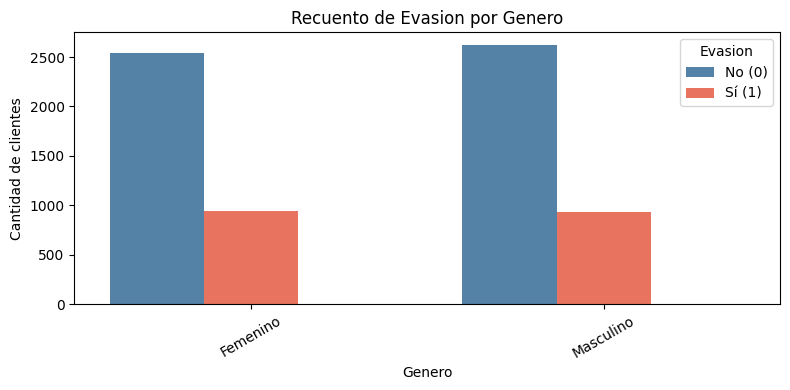

In [219]:
# Churn por género
churn_por_variable_categorica(df_flat, 'Genero')

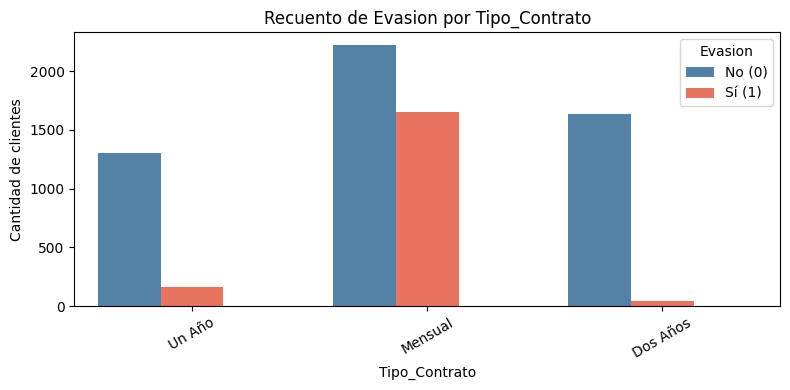

In [220]:
# Churn por contrato
churn_por_variable_categorica(df_flat, 'Tipo_Contrato')


**Observamos que : Contratos mensuales suelen tener mayor tasa de evasión.**

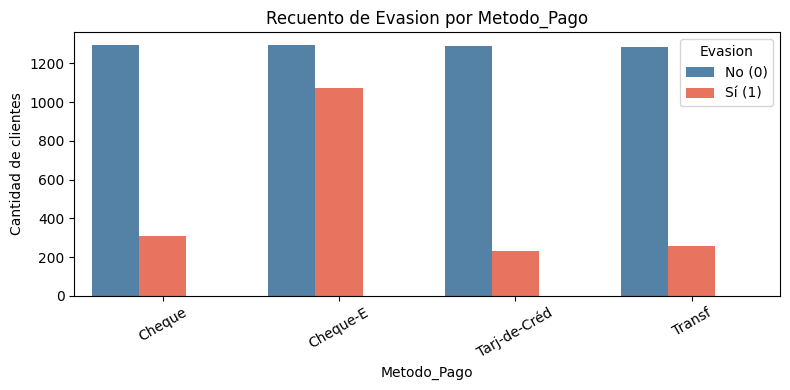

In [221]:
# Churn por forma de pago
churn_por_variable_categorica(df_flat, 'Metodo_Pago')


**Observamos que : Cheque Electrónico pueden estar más asociados a clientes que cancelan.**

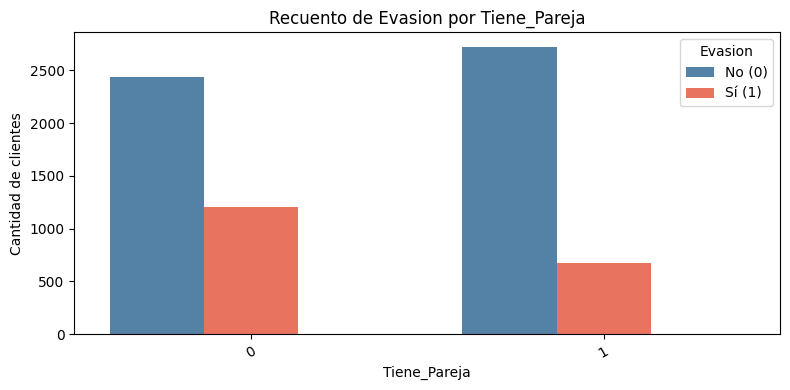

In [222]:
# Churn por si tiene pareja
churn_por_variable_categorica(df_flat, 'Tiene_Pareja')

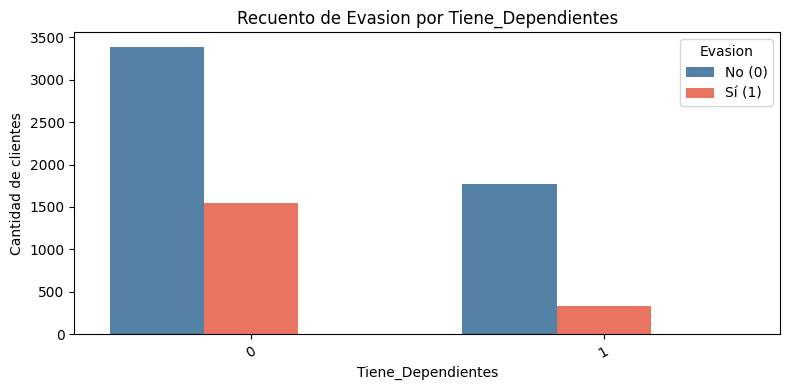

In [223]:
# Churn por dependientes
churn_por_variable_categorica(df_flat, 'Tiene_Dependientes')

**Observamos que: Clientes sin pareja o sin dependientes tienden a cancelar más.**

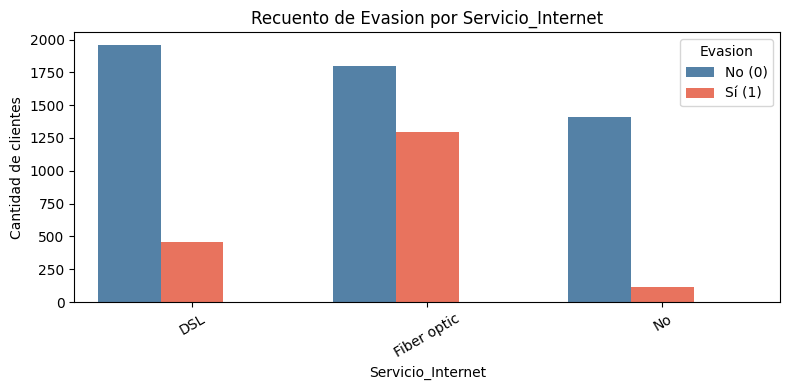

In [224]:
# Churn por internet
churn_por_variable_categorica(df_flat, 'Servicio_Internet')


**Observamos que: Clientes con fibra optica son mas provenso a darse de baja**

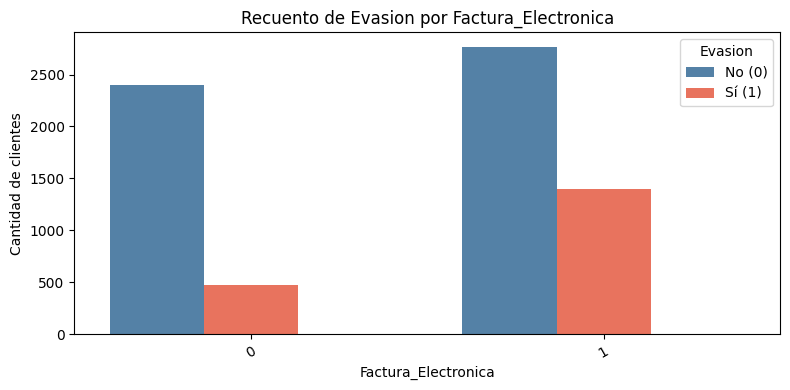

In [225]:
# Churn por facturación en papel
churn_por_variable_categorica(df_flat, 'Factura_Electronica')

**Observamos que: Clientes con factura electronica muestras una mayor cantidad de bajas**

In [231]:
#Función para visualizar variables numéricas vs. evasión
import seaborn as sns
import matplotlib.pyplot as plt

def evasion_por_variable_numerica(df, columna, figsize=(8, 4)):
    """
    Boxplot comparando una variable numérica contra la evasión (solo 0 y 1 válidos).
    """
    # Copia del DF
    df_plot = df.copy()

    # Limpiar espacios, NaN y filtrar valores válidos
    df_plot['Evasion'] = df_plot['Evasion'].astype(str).str.strip()
    df_plot = df_plot[df_plot['Evasion'].isin(['0', '1'])].copy()

    # Convertir a entero
    df_plot['Evasion'] = df_plot['Evasion'].astype(int)

    # Lista de colores (posición 0 = Evasion=0, posición 1 = Evasion=1)
    palette = ['steelblue', 'tomato']

    # Gráfico
    plt.figure(figsize=figsize)
    sns.boxplot(data=df_plot, x='Evasion', y=columna, palette=palette)
    plt.title(f'{columna} según Evasión')
    plt.xlabel('Evasión (0 = No, 1 = Sí)')
    plt.ylabel(columna)
    plt.tight_layout()
    plt.show()




/tmp/ipython-input-231-838226309.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasion', y=columna, palette=palette)


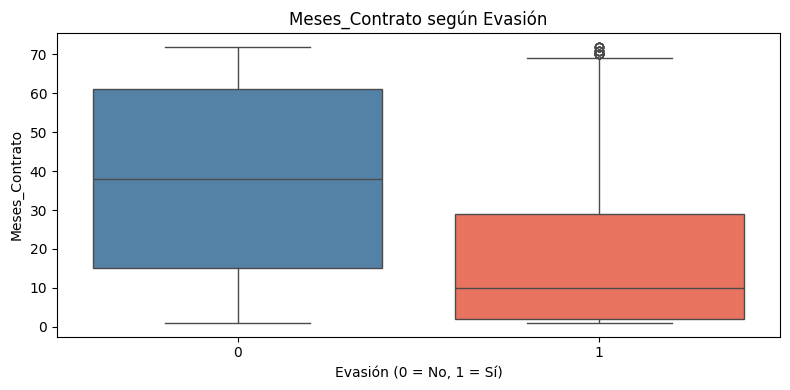

In [232]:
# Meses de contrato
evasion_por_variable_numerica(df_flat, 'Meses_Contrato')

**Insights : Los clientes que se van (Evasión = 1) tienden a tener menos meses de contrato, mostrando que los clientes nuevos son más propensos a abandonar el servicio.**

**Los clientes que se quedan (Evasión = 0) suelen tener un mayor tenure (antigüedad).**

/tmp/ipython-input-231-838226309.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasion', y=columna, palette=palette)


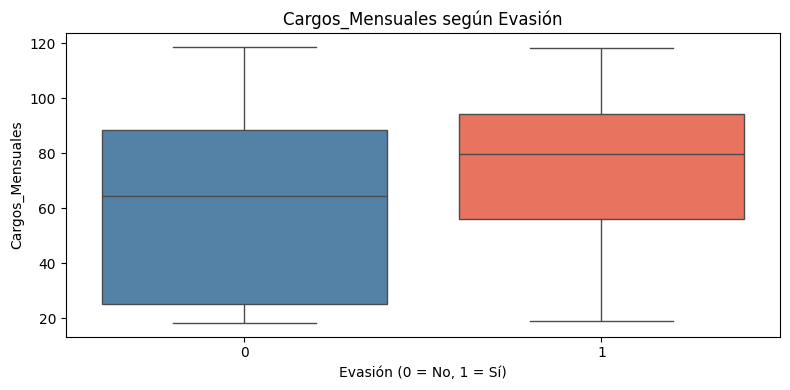

In [233]:
# Cargos mensuales
evasion_por_variable_numerica(df_flat, 'Cargos_Mensuales')

**Insights:Cargos más altos, lo que sugiere que los planes caros impulsan la cancelación.**

**Dos grupos: planes muy bajos (planes básicos) y planes muy altos, ambos con evasión alta (clientes de bajo costo poco fidelizados y clientes de alto costo insatisfechos)**

/tmp/ipython-input-231-838226309.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasion', y=columna, palette=palette)


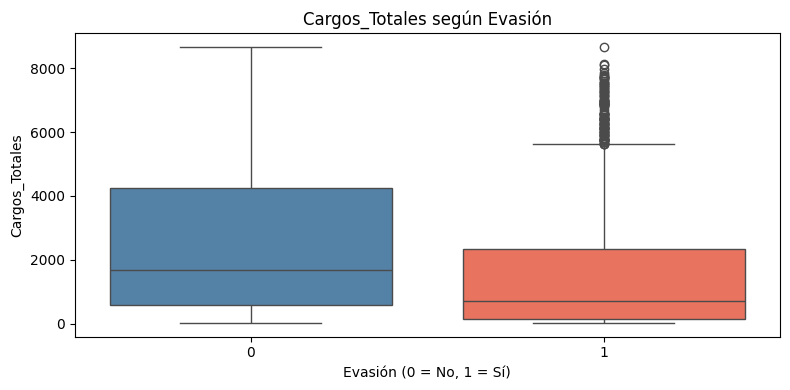

In [234]:
# Cargos totales
evasion_por_variable_numerica(df_flat, 'Cargos_Totales')


**Insights: Clientes con evasión (1) tienen cargos totales bajos, porque suelen cancelar temprano y acumulan menos facturación.**

**Clientes fieles (0) acumulan cargos más altos, reflejando mayor tiempo de permanencia.**

/tmp/ipython-input-231-838226309.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasion', y=columna, palette=palette)


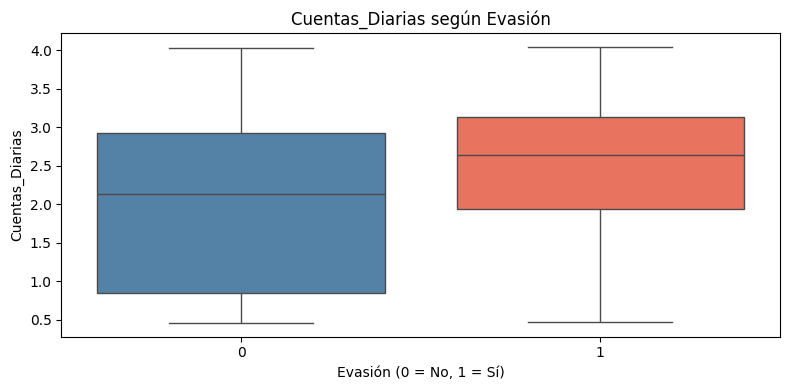

In [235]:
# Cuentas diarias
evasion_por_variable_numerica(df_flat, 'Cuentas_Diarias')

**Insights: Como la evasión está concentrada en clientes con mayor gasto por día, esto podría indicar "clientes que pagan mucho por poco tiempo"  → potencial descontento.**



#📄Informe final

Introducción

Telecom X enfrenta una alta tasa de cancelación de clientes (Churn), lo que impacta directamente en sus ingresos y crecimiento.
El objetivo de este análisis fue comprender los factores asociados a la evasión de clientes utilizando datos históricos.
Con esta información, la empresa podrá:

    Identificar patrones de comportamiento que llevan a la cancelación.

    Implementar estrategias de retención para reducir la pérdida de clientes.

    Apoyar futuros modelos predictivos de churn basados en datos reales.

2️⃣ Limpieza y Tratamiento de Datos

Los datos originales se recibieron en un archivo JSON con información estructurada por cliente, incluyendo:

    Datos demográficos

    Servicios contratados

    Información de facturación

    Variable objetivo: Evasión (Churn)

Se aplicaron los siguientes pasos de procesamiento:

    Importación y normalización:

        Se expandieron columnas anidadas (customer, phone, internet, account) para generar un dataset plano (DataFrame).

        Se estandarizaron nombres de columnas y valores para lectura en español.

    Tratamiento de valores faltantes:

        Se identificaron 224 registros sin información en Evasión.

        Se mantuvieron para análisis descriptivo, pero se filtraron en análisis predictivos y gráficos numéricos.

    Conversión de tipos de datos:

        Cargos_Totales y Cargos_Mensuales convertidos a float.

        Evasión convertida a valores binarios (0 = No canceló, 1 = Canceló).

    Nueva variable:

        Cuentas_Diarias = Cargos_Totales / (Meses_Contrato * 30) para medir gasto promedio diario por cliente.

    Estandarización:

        Variables categóricas (Yes/No) se convirtieron a 1/0.

        Traducción de valores (Genero, Tipo_Contrato, Metodo_Pago) al español.

3️⃣ Análisis Exploratorio de Datos (EDA)

Se realizaron diferentes análisis para entender los patrones de churn.
📊 3.1 Distribución de Evasión

    71.2% de clientes permanecen activos (0).

    25.8% de clientes cancelaron (1).

    3.1% registros sin información.

    📌 El dataset presenta un churn significativo, aunque con mayoría de clientes retenidos.

📊 3.2 Variables Categóricas

    Tipo de contrato:

        Mayor churn en contratos Mensuales comparado con planes de 1 o 2 años.

        Clientes con contrato más largo son más leales.

    Método de pago:

        Mayor churn en clientes que usan Cheque Electrónico, posiblemente por menor fidelización o problemas de pago.

    Internet y servicios adicionales:

        Clientes sin servicios complementarios (seguridad online, respaldo) tienden a cancelar más, sugiriendo que los extras aumentan fidelidad.

    Pareja y dependientes:

        Clientes sin pareja y sin dependientes muestran tasas más altas de cancelación.

📊 3.3 Variables Numéricas

    Meses de contrato:

        Clientes con menos tiempo en la compañía muestran mayor propensión a cancelar.

        La retención es clave durante los primeros meses.

    Cargos mensuales:

        Churn algo mayor en clientes con planes de alto costo, posiblemente por percepción de precio elevado.

    Cargos totales:

        Clientes con baja facturación acumulada (poco tiempo de permanencia) concentran la mayoría de cancelaciones.

    Cuentas diarias:

        Clientes con gasto diario elevado presentan una ligera mayor probabilidad de cancelar.

4️⃣ Conclusiones e Insights

    Alta evasión en los primeros meses: la falta de compromiso a largo plazo incrementa la cancelación.

    Método de pago influye: usuarios de cheque electrónico muestran mayor propensión a churn.

    Planes caros y sin extras (seguridad, soporte) aumentan el riesgo de baja.

    Segmento de clientes sin pareja o dependientes parece menos fiel.

    El 25-30% del total de clientes cancela, una tasa relevante para la compañía.

5️⃣ Recomendaciones Estratégicas

    A-Fidelización temprana:

        Bonificaciones o descuentos en los primeros meses para disminuir la cancelación temprana.

        Programas de onboarding para clientes nuevos.

    B-Incentivos a contratos largos:

        Promociones o beneficios para migrar clientes de contratos mensuales a anuales.

    C-Revisión de precios y planes:

        Ajustar tarifas altas o incluir servicios adicionales de valor percibido para evitar cancelación por costos.

    D-Promover pagos automáticos:

        Incentivar uso de tarjeta o transferencia automática, reduciendo churn de usuarios con cheque electrónico.

    E-Enriquecer servicios:

        Ofrecer paquetes con seguridad online, soporte técnico y streaming para fidelizar clientes.

    F-Depuración de datos:

        Completar registros de evasión faltantes para mejorar futuros modelos predictivos.